# 1. Introduction
## 1.1 Stock Sentiment Analysis Using Financial News
Performing sentiment analysis on Indian stock market news using financial news from reputed sources like **Economic Times, Financial Express, or Bloomberg Quint** involves several steps. The goal is to process news headlines or articles, extract sentiment, and analyze the impact on stock prices.

## 1.2 Steps Involved
1. **Data Collection:** Collect financial news data (headlines/articles) from reliable sources using APIs, web scraping, or publicly available datasets.
2. **Preprocessing:** Clean and preprocess the text data.
3. **Sentiment Analysis:** Use natural language processing (NLP) models to analyze the sentiment (positive, negative, or neutral) of the news.
4. **Stock Analysis:** Correlate the sentiment with stock market trends (e.g., stock price changes).

## 1.3 Implementation Requirements
### Libraries:
* `pandas, nltk, transformers, beautifulsoup4, requests` (for scraping), or APIs for data gathering.
* **Sentiment analysis models:** Traditional models like **VADER** or advanced models like **BERT** for financial sentiment.

# 2. Import libraries
* required these libraries when scraping data from websites and convert the extracted content into a structured format from webpages, like stock news, blogs, articles, etc.
* installing **transformers** library developed by **Hugging Face** that provides **ML** models like
  * **BERT,**
  * **GPT-3** and others
* it allows to use pre-trained models and tools for **NLP** tasks such as
  * text classification,
  * sentiment analysis, and more.
* installing **pytorch** helps for deep learning tasks.


In [1]:
!pip install transformers torch

In [2]:
# for sending HTTP requests; it allows us to access and retrieve data from the web
import requests

# for parsing HTML; it helps us parse and navigate HTML, making it easy to extract data like news headlines.
from bs4 import BeautifulSoup

# for data manipulation; it allows us to organize and manipulate this data in tabular form
import pandas as pd

# Comprehensive library for natural language processing tasks, where text data needs to be cleaned, tokenized, and transformed.
import nltk

# helps to remove stopwords like 'and', 'the', 'is', which do not contribute much to sentiment
from nltk.corpus import stopwords

# breaking text into individual words (tokenization).
from nltk.tokenize import word_tokenize

# Regular expression operations from the 're' module, to check if a string contains the specified search pattern.
# https://regex101.com/
import re

# useing Hugging Face’s transformers library to load a pre-trained BERT-based sentiment analysis model
from transformers import pipeline

# 3. Data Collection
## 3.1 Data collection with web scraping
* Collect financial news data (scraping from **Economic Times** as an example)
* sends an HTTP GET request to the 'Economic Times' website to get the page’s HTML content and parses it using `BeautifulSoup`.

In [3]:
# url = "https://economictimes.indiatimes.com/markets/stocks"
url = "https://www.screener.in/company/INFY/consolidated/" # Good
# url = "https://www.screener.in/company/KALYANKJIL/consolidated/"
# url = "https://www.screener.in/company/TCS/consolidated/"
# url = "https://www.financialexpress.com/markets/stocks"
# url = "https://www.ndtvprofit.com/stock/1003479/kalyan-jewellers"
# url = "https://www.ndtv.com/topic/" blocked
# url = "https://www.livemint.com/market/market-stats/"
# url = "https://www.business-standard.com/markets/axis-bank-ltd-share-price-5554.html"
# url = "https://economictimes.indiatimes.com/markets/stocks"


# sends an HTTP request to the 'Economic Times' website to get the page’s HTML content and retrieves the webpage’s HTML.
response = requests.get(url)
# print(response)

# response is then passed to 'BeautifulSoup' for parsing so that we can access individual HTML elements, such as the headlines.
soup = BeautifulSoup(response.content, "html.parser")
# soup

* extracts all the **h3** tags from the parsed HTML content
* most news websites, headlines are usually wrapped in specific HTML tags like **h3**; extract these to get the actual news headlines.
* Use this to extract specific HTML tags that contain the information (e.g., headlines, articles).


In [4]:

# find and extracts all headline elements (this depends on the website structure)
headlines = soup.find_all('h3')  # Modify tag/structure based on source
# headlines = soup.find_all('body')
# headlines = soup.find_all('div')
# headlines = soup.find_all('span')
print(headlines)

# Extract the text from the headlines
news_data = []
for headline in headlines:
    news_data.append(headline.get_text())
news_data

[<h3 class="margin-bottom-8">Announcements</h3>, <h3>Annual reports</h3>, <h3>Credit ratings</h3>, <h3 class="margin-0">Concalls</h3>]


['Announcements', 'Annual reports', 'Credit ratings', 'Concalls']

## 3.2 Data organization using **Pandas** dataframe
* converts the list of headlines into a `pandas DataFrame`, with the column name **“Headline”**
* used for tabular organization of data to organize, manipulate, or analyze using pandas’ powerful DataFrame functionality.


In [5]:
news_df = pd.DataFrame(news_data, columns=["Headline"])
print(news_df.head())

         Headline
0   Announcements
1  Annual reports
2  Credit ratings
3        Concalls


# 4. Preprocessing the Text Data
Dataset EDA (Exploratory Data Analysis)

In [6]:
# Download stopwords once (if not already installed)
nltk.download('stopwords')

# Download punkt tokenizer once (if not already installed)
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## 4.1 Function for text preprocessing
* to clean the text data by removing unwanted characters, converting text to lowercase, and removing stopwords.
* for reducing noise in data; ensuring that the news headlines are cleaned and tokenized, making them ready for sentiment analysis.


In [7]:
def preprocess_text(text):

    # Remove special characters, digits, and extra spaces
    # https://regex101.com/

    # case sensitive, "\W" matches any non-word character (equivalent to [^a-zA-Z0-9_]) except for line terminators and replace with 'space'
    text = re.sub(r'\W', ' ', text)

    # case sensitive, "\s+"" matches any whitespace character (equivalent to [\r\n\t\f\v ]) any number of times except for line terminators and replace with 'space'
    text = re.sub(r'\s+', ' ', text)

    # Convert to lowercase
    text = text.lower()

    # Tokenize and remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]

    return ' '.join(filtered_tokens)


## 4.2 Apply preprocessing to the news headlines
* applies the **preprocess_text** function to every row of the **Headline** column and stores the cleaned results in a new column **Cleaned_Headline.**
* It cleans the raw headlines and stores the cleaned version in a new column for later use in sentiment analysis.


In [8]:
news_df['Cleaned_Headline'] = news_df['Headline'].apply(preprocess_text)
print(news_df.head())

         Headline Cleaned_Headline
0   Announcements    announcements
1  Annual reports   annual reports
2  Credit ratings   credit ratings
3        Concalls         concalls


# 5. Sentiment Analysis Using Pre-trained BERT
**Huggingface** pipeline will return either **"positive" or "negative"** sentiment. Need to expand this using financial-specific sentiment models (e.g., **FinBERT**).

## 5.1 Load the pre-trained **BERT** model for sentiment analysis
* uses **Hugging Face’s** `transformers` library to load a pre-trained BERT-based sentiment analysis model.


In [9]:
sentiment_pipeline = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. Th

## 5.2 Apply the model to the cleaned headlines
* using **Hugging Face’s transformers** library to load a pre-trained **BERT-based** sentiment analysis model and applies it to each cleaned headline.
* it perform advanced sentiment analysis on text data, especially when require context-aware sentiment analysis (e.g., "not good" being negative).


In [10]:
news_df['Sentiment'] = news_df['Cleaned_Headline'].apply(lambda x: sentiment_pipeline(x)[0]['label'])

## 5.3 Display the results

In [11]:
print(news_df[['Headline', 'Sentiment']])

         Headline Sentiment
0   Announcements  POSITIVE
1  Annual reports  POSITIVE
2  Credit ratings  POSITIVE
3        Concalls  POSITIVE


In [12]:
!pip install yfinance

import yfinance as yf
import datetime

# Step 1: Download historical stock data
# stock_symbol = 'TCS'  # Example: TCS (Tata Consultancy Services)
stock_symbol = 'INFY'  # Example: Infosys Ltd
start_date = '2023-09-27'
end_date = '2024-09-26'
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Step 2: Display the stock data (Closing price)
print(stock_data[['Close']].tail())

# Step 3: Merge sentiment data with stock data based on date
# Assuming we have 'Date' column in the news DataFrame matching with stock prices
# Correlation and statistical analysis can be performed here

[*********************100%***********************]  1 of 1 completed

                Close
Date                 
2024-09-19  22.690001
2024-09-20  22.850000
2024-09-23  22.690001
2024-09-24  22.580000
2024-09-25  22.559999


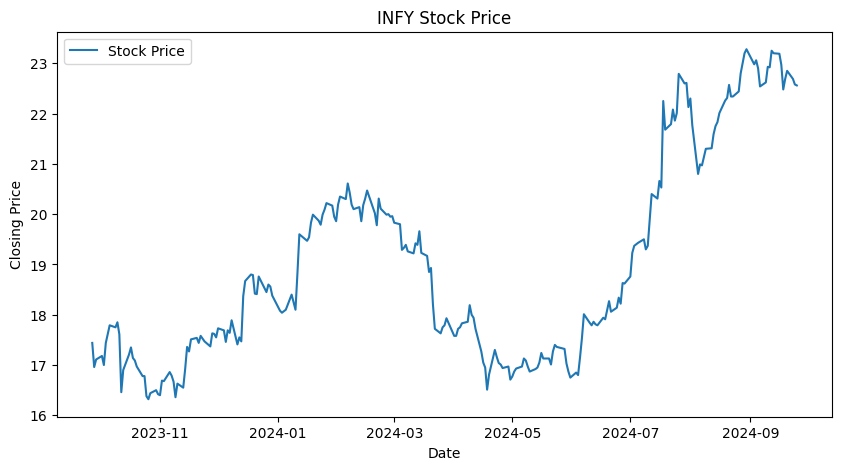

In [13]:
import matplotlib.pyplot as plt

# Plot stock prices
plt.figure(figsize=(10,5))
plt.plot(stock_data['Close'], label='Stock Price')
plt.title(f"{stock_symbol} Stock Price")
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()
